# Kaitlyn Griffin
Group 26<br>
Samplesort implementation plotting

In [16]:
# used to install the version of thicket used on Grace
!pip install llnl-thicket==2024.1.0

In [17]:
import sys
sys.path.append("/thicket")

from google.colab import drive
drive.mount('/content/drive')

from glob import glob
from tabulate import tabulate

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th
import numpy as np


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import os

# define path to caliper files in Google Drive
caliper_folder = '/content/drive/My Drive/caliper/'

# print out files to verify
files = os.listdir(caliper_folder)
print(files)


['cali-sampsort-p128-exp16-1_perc_perturbed.cali', 'cali-sampsort-p128-exp16-Random.cali', 'cali-sampsort-p16-exp18-Random.cali', 'cali-sampsort-p128-exp18-1_perc_perturbed.cali', 'cali-sampsort-p16-exp18-1_perc_perturbed.cali', 'cali-sampsort-p16-exp16-Sorted.cali', 'cali-sampsort-p128-exp24-Random.cali', 'cali-sampsort-p128-exp20-ReverseSorted.cali', 'cali-sampsort-p16-exp16-ReverseSorted.cali', 'cali-sampsort-p128-exp24-ReverseSorted.cali', 'cali-sampsort-p128-exp16-ReverseSorted.cali', 'cali-sampsort-p128-exp16-Sorted.cali', 'cali-sampsort-p16-exp18-Sorted.cali', 'cali-sampsort-p128-exp20-1_perc_perturbed.cali', 'cali-sampsort-p128-exp20-Sorted.cali', 'cali-sampsort-p128-exp22-ReverseSorted.cali', 'cali-sampsort-p16-exp16-1_perc_perturbed.cali', 'cali-sampsort-p128-exp18-ReverseSorted.cali', 'cali-sampsort-p128-exp18-Random.cali', 'cali-sampsort-p128-exp22-Random.cali', 'cali-sampsort-p128-exp20-Random.cali', 'cali-sampsort-p128-exp22-Sorted.cali', 'cali-sampsort-p128-exp24-Sorted.

In [19]:
# load Thicket from the caliper files
tk = th.Thicket.from_caliperreader(glob(os.path.join(caliper_folder, "*.cali")))

(2/2) Creating Thicket: 100%|██████████| 223/223 [00:06<00:00, 35.95it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


View Calltree

In [20]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

1.513 main
├─ 0.000 MPI_Comm_dup
├─ 0.000 MPI_Finalize
├─ 0.000 MPI_Finalized
├─ 0.000 MPI_Init
├─ 0.000 MPI_Initialized
├─ 0.226 MPI_Reduce
├─ 0.282 comm
│  ├─ 0.262 comm_large
│  │  ├─ 0.261 MPI_Bcast
│  │  └─ 0.001 MPI_Gather
│  └─ 0.020 comm_small
│     ├─ 0.012 MPI_Alltoall
│     └─ 0.009 MPI_Alltoallv
├─ 0.524 comp
│  ├─ 0.215 comp_large
│  └─ 0.244 comp_small
├─ 0.006 correctness_check
└─ 0.009 data_init_runtime



In [21]:
tk.metadata[["algorithm","programming_model","data_type","size_of_data_type","input_size","input_type","num_procs","scalability","group_num","implementation_source"]]

algorithm programming_model data_type  size_of_data_type  \
profile                                                                 
34485034    samplesort               mpi       int                  4   
38682806    samplesort               mpi       int                  4   
51117584    samplesort               mpi       int                  4   
53968491    samplesort               mpi       int                  4   
96095469    samplesort               mpi       int                  4   
...                ...               ...       ...                ...   
4188808221  samplesort               mpi       int                  4   
4245103482  samplesort               mpi       int                  4   
4258348610  samplesort               mpi       int                  4   
4273885842  samplesort               mpi       int                  4   
4289233760  samplesort               mpi       int                  4   

            input_size      input_type  num_procs scalability  group_num  \
profile                                                                    
34485034      16777216          Sorted          8      strong         26   
38682806       4194304  Reverse sorted         64      strong         26   
51117584      16777216  Reverse sorted        256      strong         26   
53968491        262144          Random          8      strong         26   
96095469       4194304  Reverse sorted          8      strong         26   
...                ...             ...        ...         ...        ...   
4188808221     1048576          Sorted        128      strong         26   
4245103482    16777216          Random         32      strong         26   
4258348610    16777216  Reverse sorted        128      strong         26   
4273885842     4194304          Random        128      strong         26   
4289233760     4194304   1%% perturbed         32      strong         26   

           implementation_source  
profile                           
34485034           AI and Online  
38682806           AI and Online  
51117584           AI and Online  
53968491           AI and Online  
96095469           AI and Online  
...                          ...  
4188808221         AI and Online  
4245103482         AI and Online  
4258348610         AI and Online  
4273885842         AI and Online  
4289233760         AI and Online  

[224 rows x 10 columns]

For each of comp_large, comm, and main:
- Strong scaling plots for each input_size with lines for input_type (7 plots - 4 lines each)
- Strong scaling speedup plot for each input_type (4 plots)
- Weak scaling plots for each input_type (4 plots)

In [22]:
# Define common variables
processes = [2, 4, 8, 16, 32, 64, 128, 256, 512,1024]
array_sizes = [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]
input_types = ['1%% perturbed', 'Random', 'Reverse sorted', 'Sorted']

In [23]:
# change font size for all plots
plt.rcParams.update({"font.size": 20})

In [24]:
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("input_size")
tk.metadata_column_to_perfdata("input_type")

tk.dataframe = tk.dataframe.reset_index().set_index(["node", "num_procs", "input_size", "input_type"]).sort_index()

tk.dataframe.head()

profile  \
node                                 num_procs input_size input_type                   
{'name': 'main', 'type': 'function'} 2         65536      1%% perturbed   1914014452   
                                                          Random          1808898172   
                                                          Reverse sorted  3930390073   
                                                          Sorted          3023989196   
                                               262144     1%% perturbed   1335468461   

                                                                          nid  \
node                                 num_procs input_size input_type            
{'name': 'main', 'type': 'function'} 2         65536      1%% perturbed   1.0   
                                                          Random          1.0   
                                                          Reverse sorted  1.0   
                                                          Sorted          1.0   
                                               262144     1%% perturbed   1.0   

                                                                           spot.channel  \
node                                 num_procs input_size input_type                      
{'name': 'main', 'type': 'function'} 2         65536      1%% perturbed   regionprofile   
                                                          Random          regionprofile   
                                                          Reverse sorted  regionprofile   
                                                          Sorted          regionprofile   
                                               262144     1%% perturbed   regionprofile   

                                                                          Min time/rank  \
node                                 num_procs input_size input_type                      
{'name': 'main', 'type': 'function'} 2         65536      1%% perturbed        0.391947   
                                                          Random               0.440303   
                                                          Reverse sorted       0.344462   
                                                          Sorted               0.303798   
                                               262144     1%% perturbed        0.338220   

                                                                          Max time/rank  \
node                                 num_procs input_size input_type                      
{'name': 'main', 'type': 'function'} 2         65536      1%% perturbed        0.391950   
                                                          Random               0.440318   
                                                          Reverse sorted       0.347606   
                                                          Sorted               0.303950   
                                               262144     1%% perturbed        0.339202   

                                                                          Avg time/rank  \
node                                 num_procs input_size input_type                      
{'name': 'main', 'type': 'function'} 2         65536      1%% perturbed        0.391949   
                                                          Random               0.440310   
                                                          Reverse sorted       0.346034   
                                                          Sorted               0.303874   
                                               262144     1%% perturbed        0.338711   

                                                                          Total time  \
node                                 num_procs input_size input_type                   
{'name': 'main', 'type': 'function'} 2         65536      1%% perturbed     0.783897   
                                                          Random            

In [25]:
def plot_mpl(df, title, xlabel, ylabel, legend):
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(legend)
    plt.xscale("log", base=2)
    plt.xticks(processes)
    ax.set_xticklabels(processes)
    plt.show()
    return fig, ax

# STRONG SCALING TIME

main


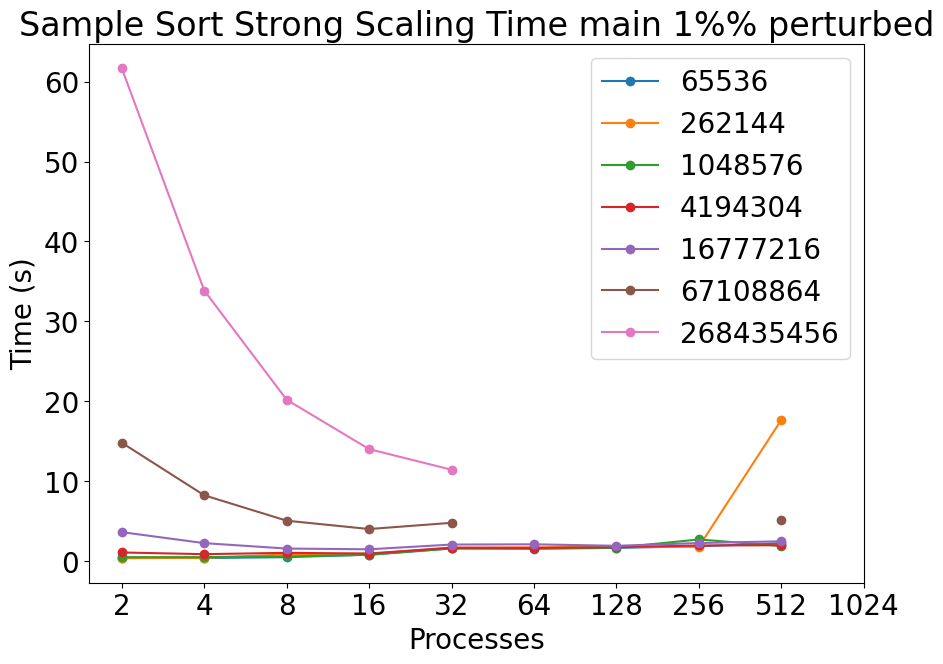

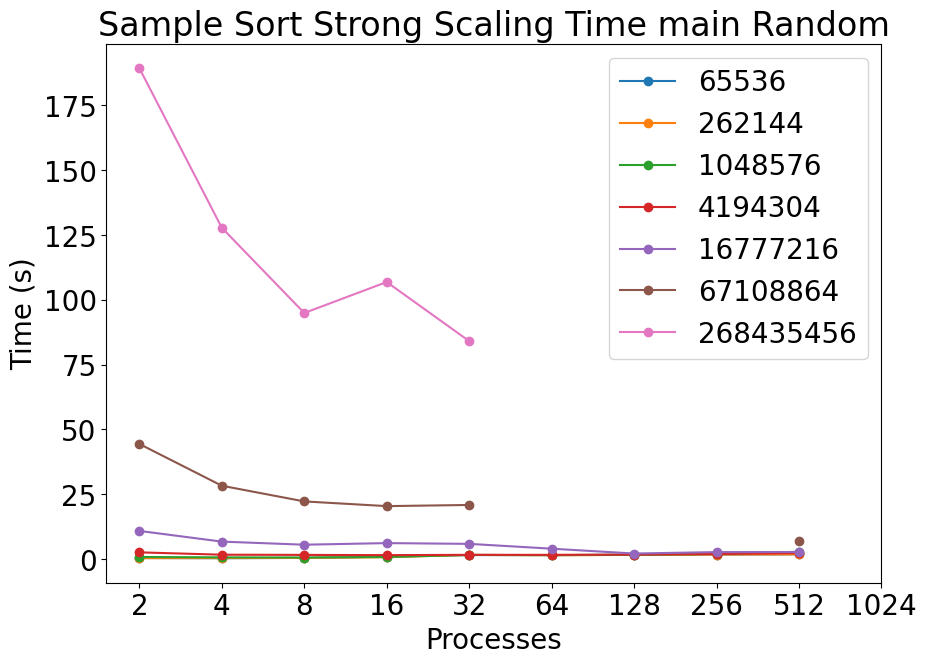

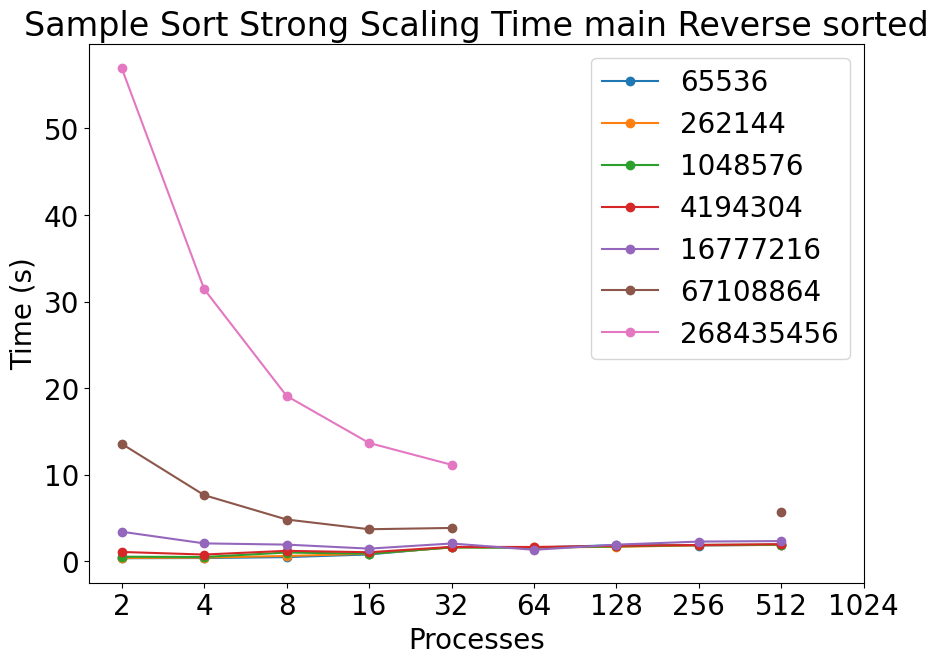

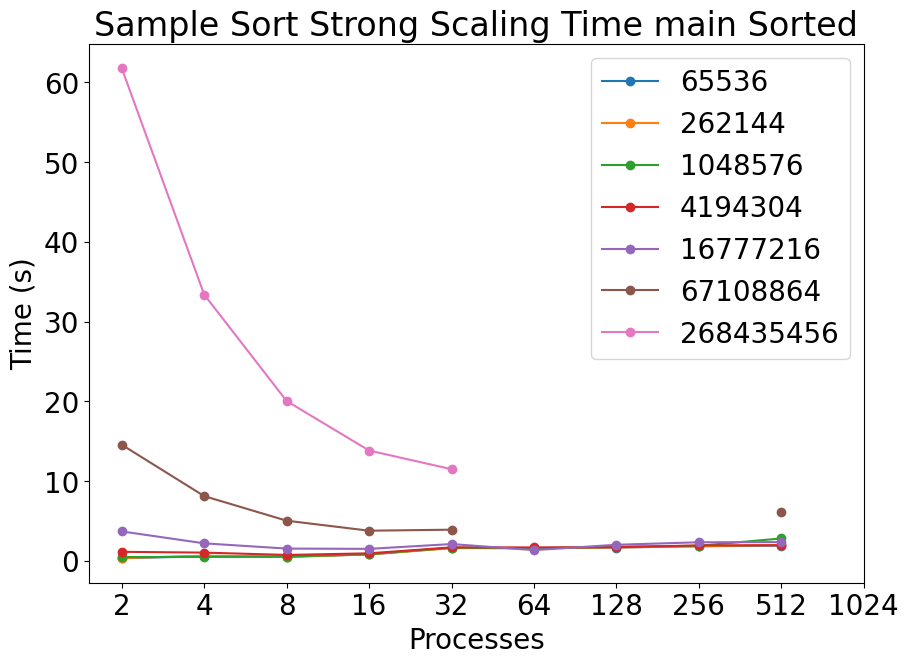

comm


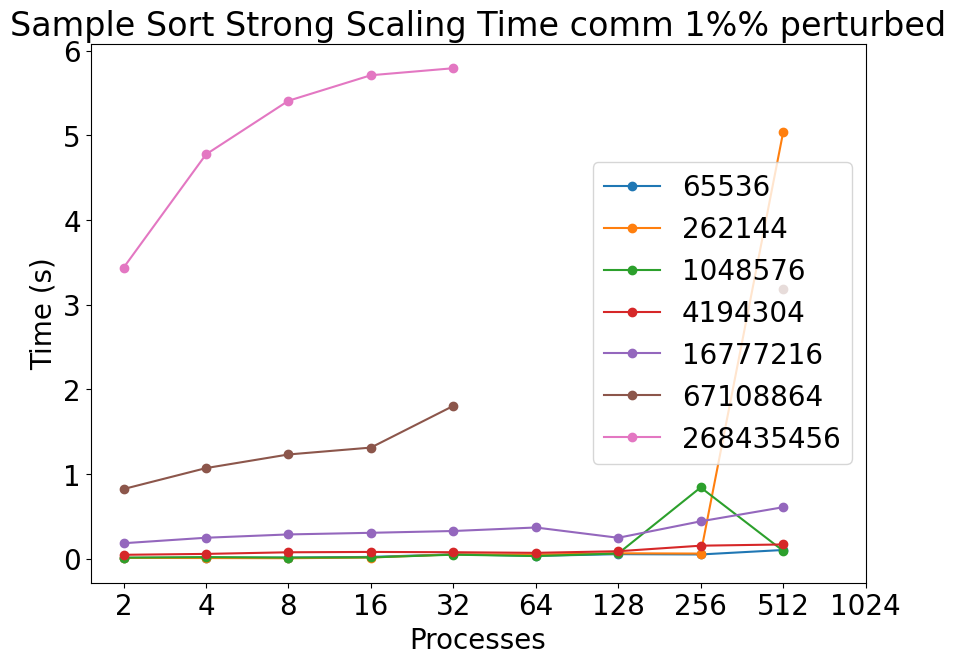

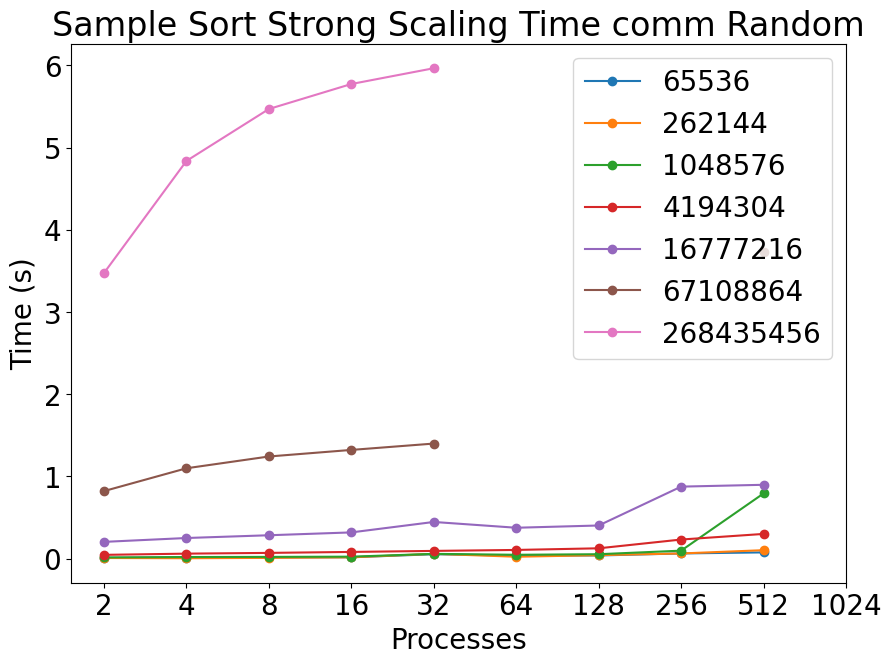

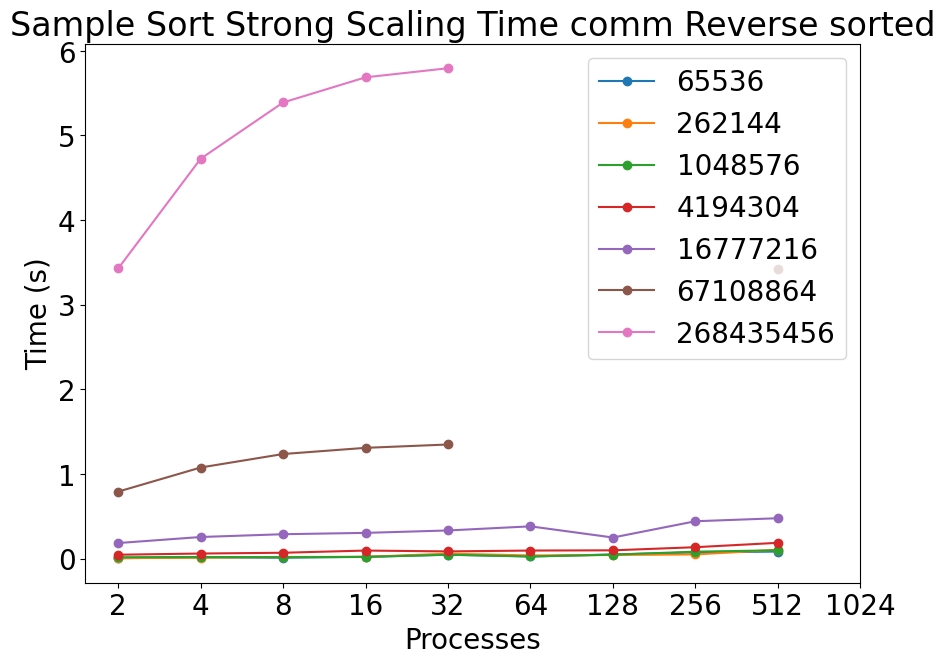

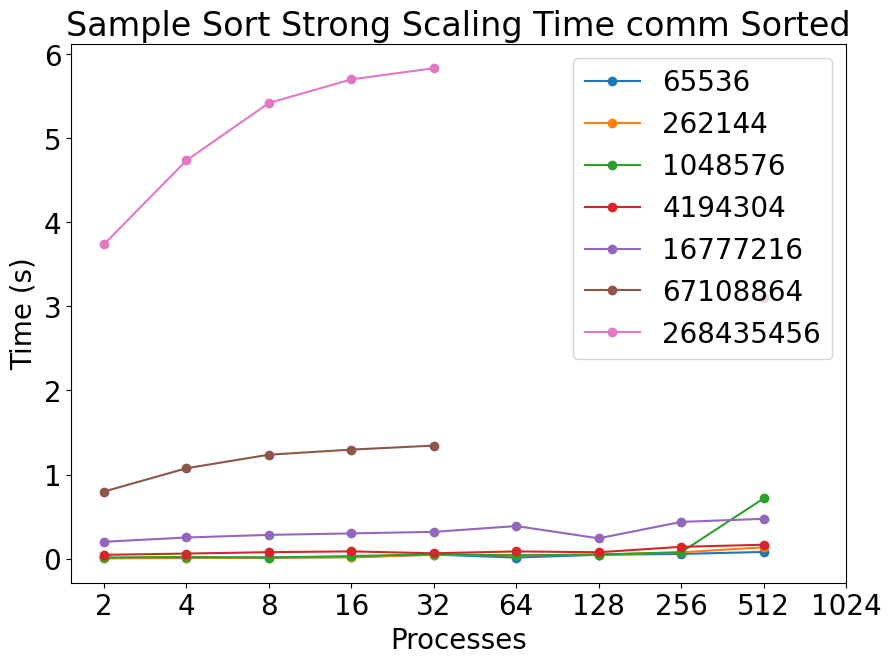

comp_large


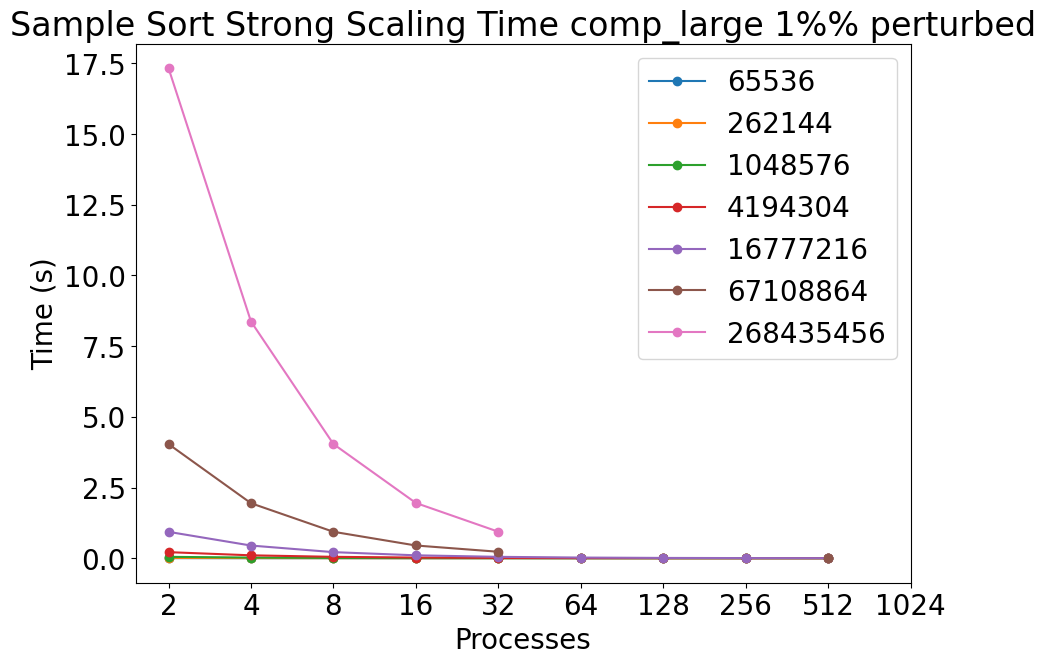

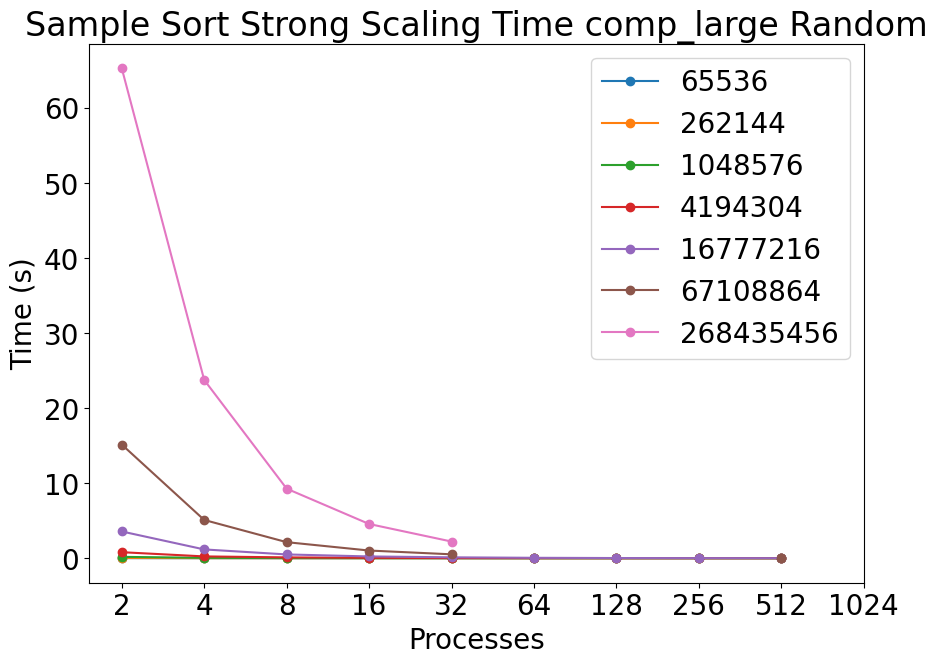

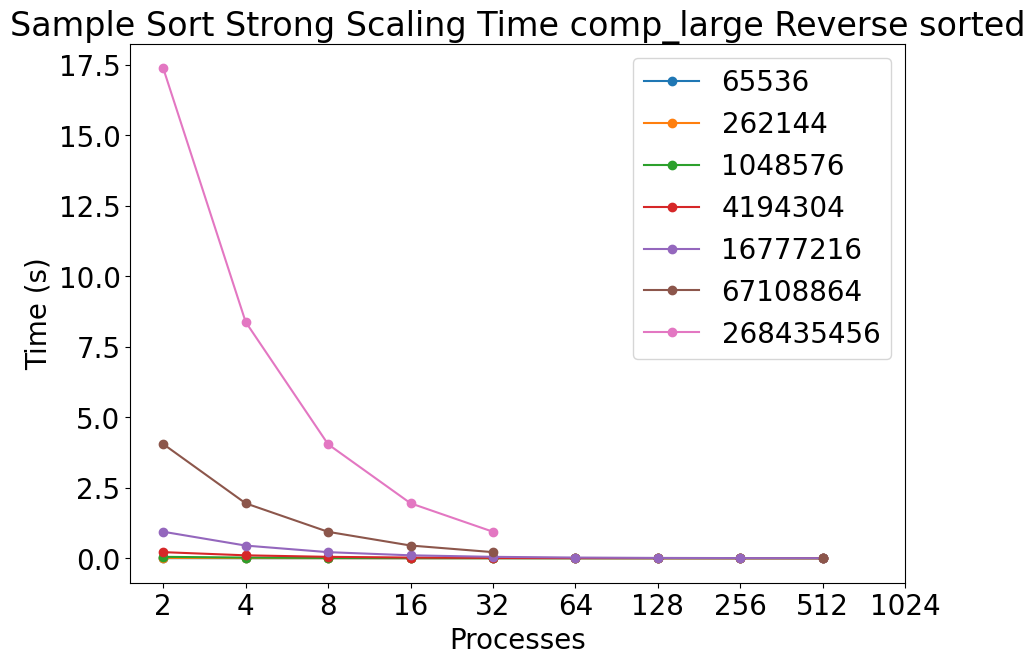

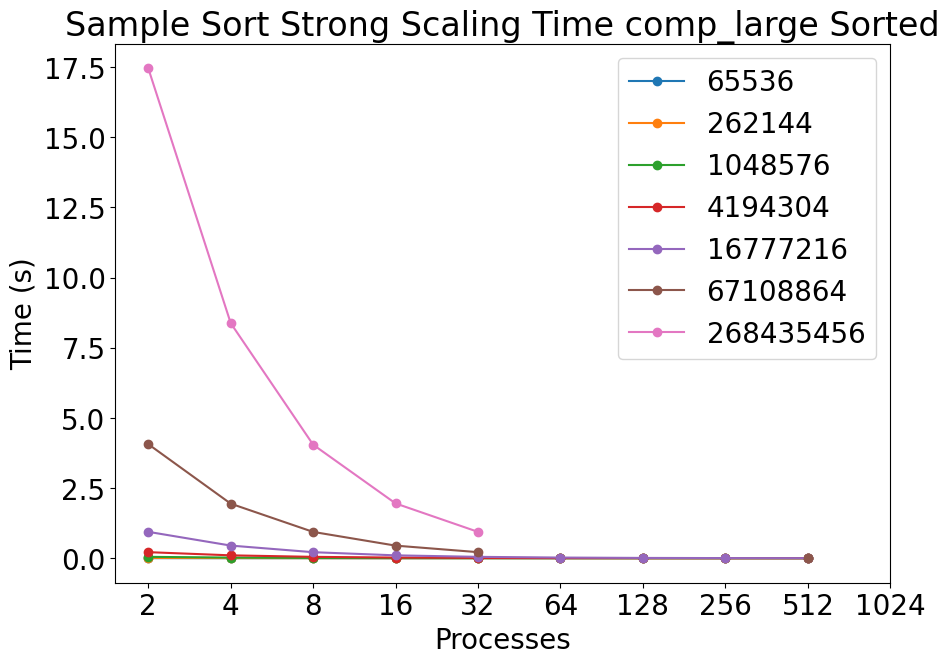

In [26]:
title_template0 = "Sample Sort Strong Scaling Time {} {}"

for node in tk.graph.traverse():
    if node.frame['name'] == 'main' or node.frame['name'] == 'comp_large' or node.frame['name'] == 'comm':
        print(node.frame['name'])
        for itype in input_types:
            title = title_template0.format(node.frame['name'], itype)
            df = tk.dataframe.loc[node, 'Avg time/rank']
            df = (df.loc[df.index.get_level_values('input_type') == itype])
            df = df.unstack(level="input_size")
            df = df.unstack(level="input_type")

            plot_mpl(df, title, "Processes", "Time (s)", array_sizes)

# STRONG SCALING SPEEDUP

main


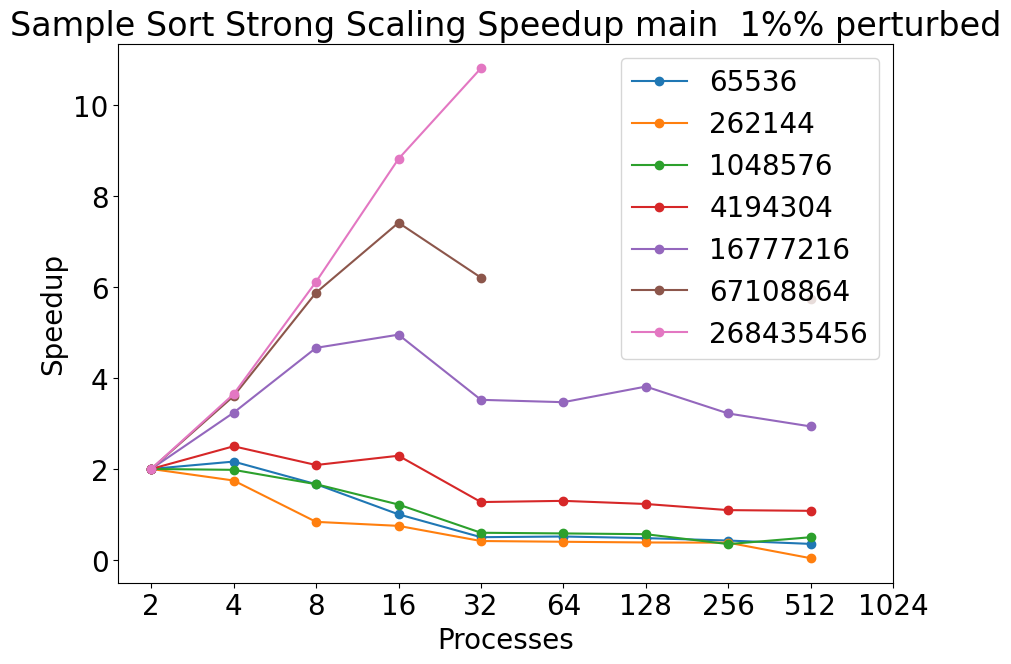

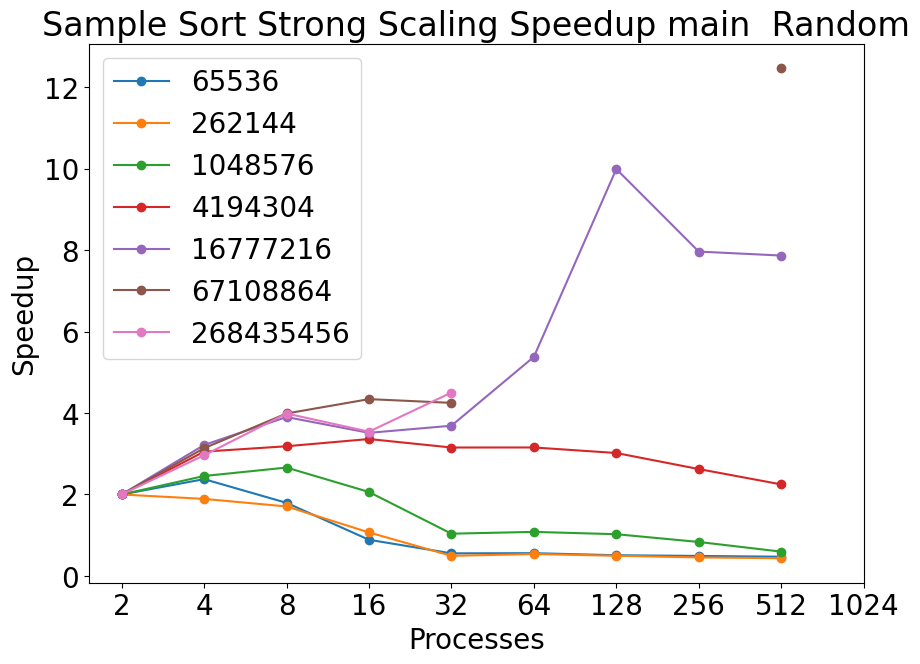

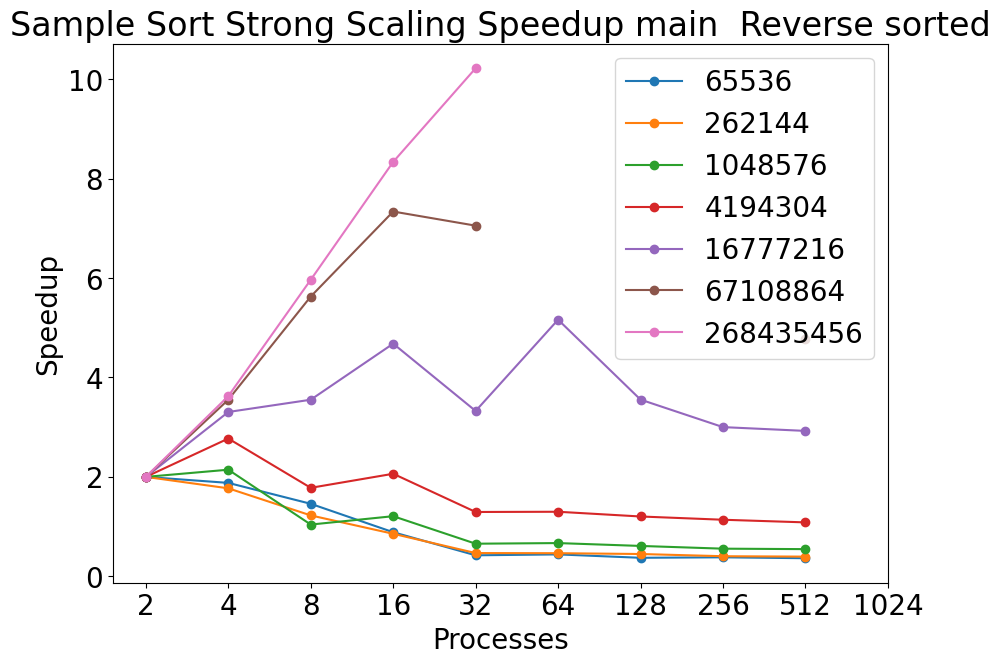

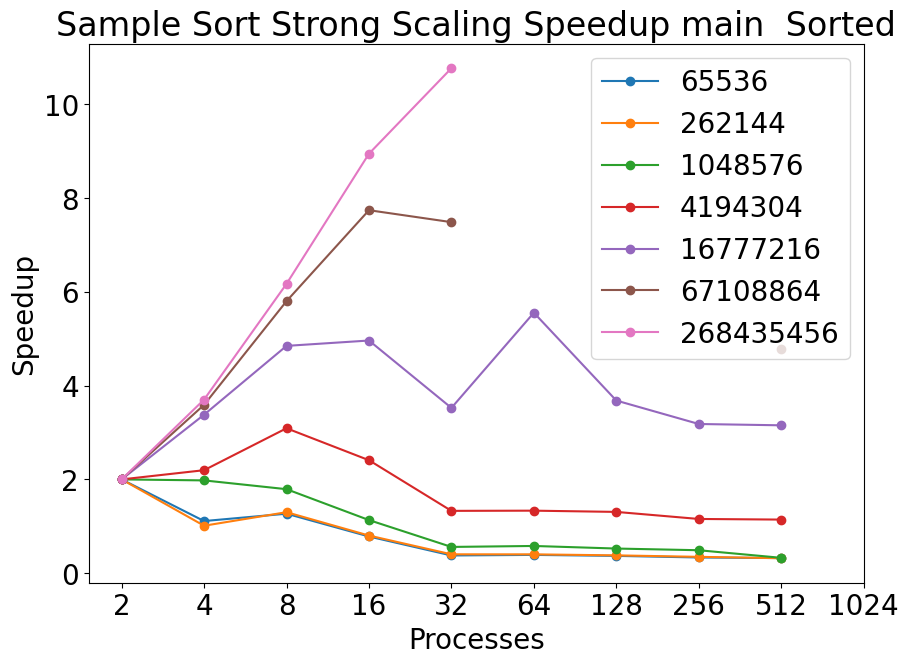

comm


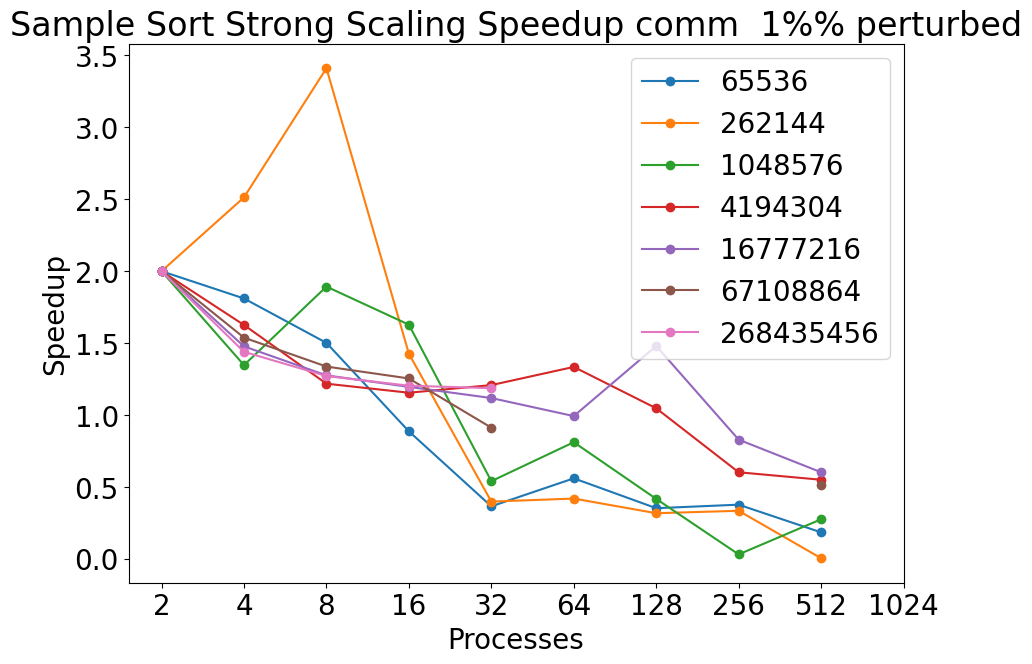

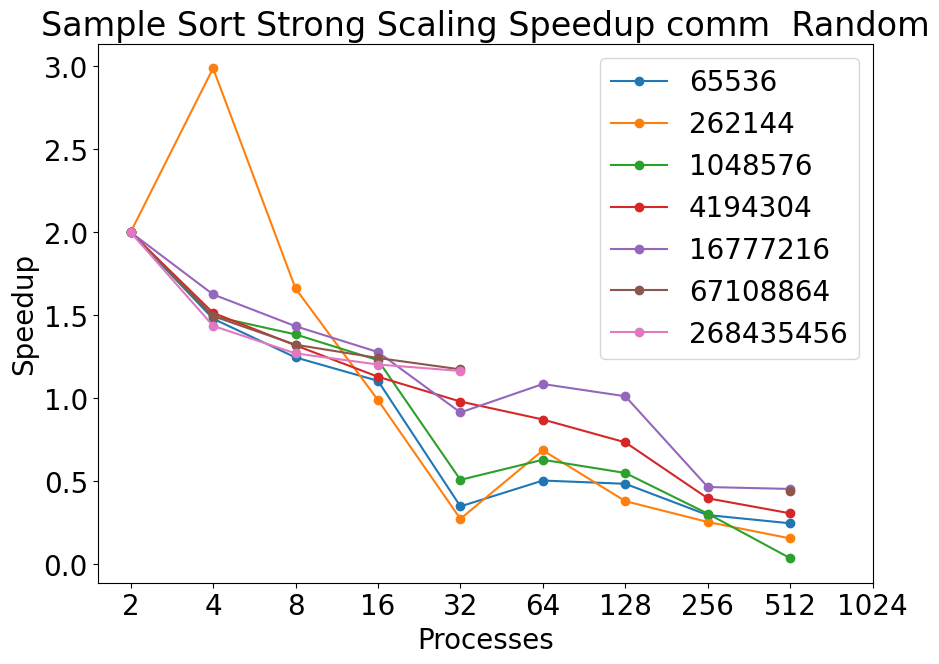

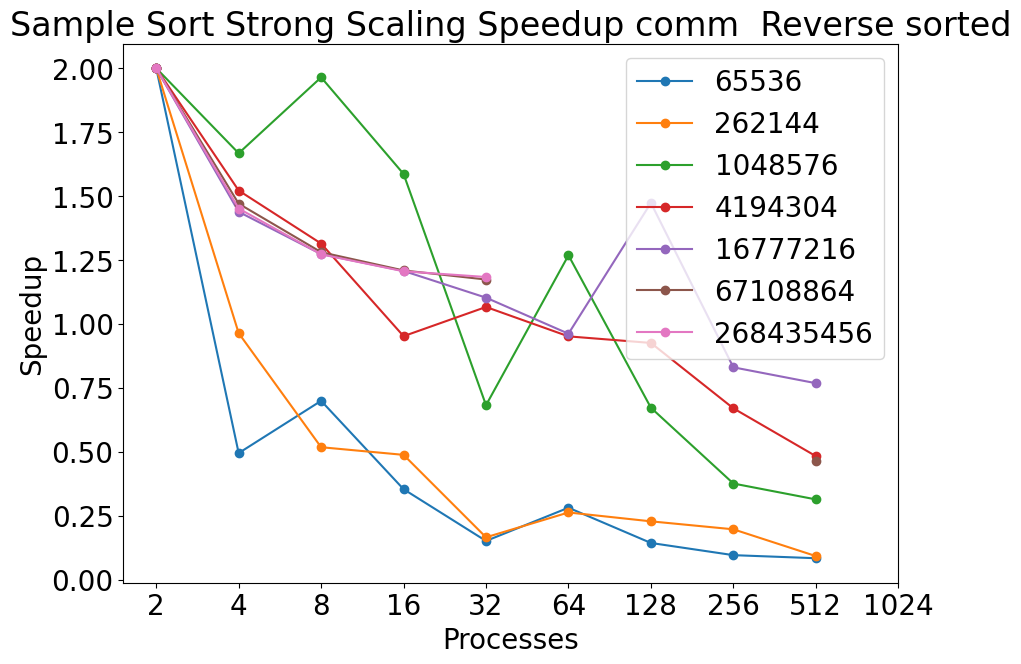

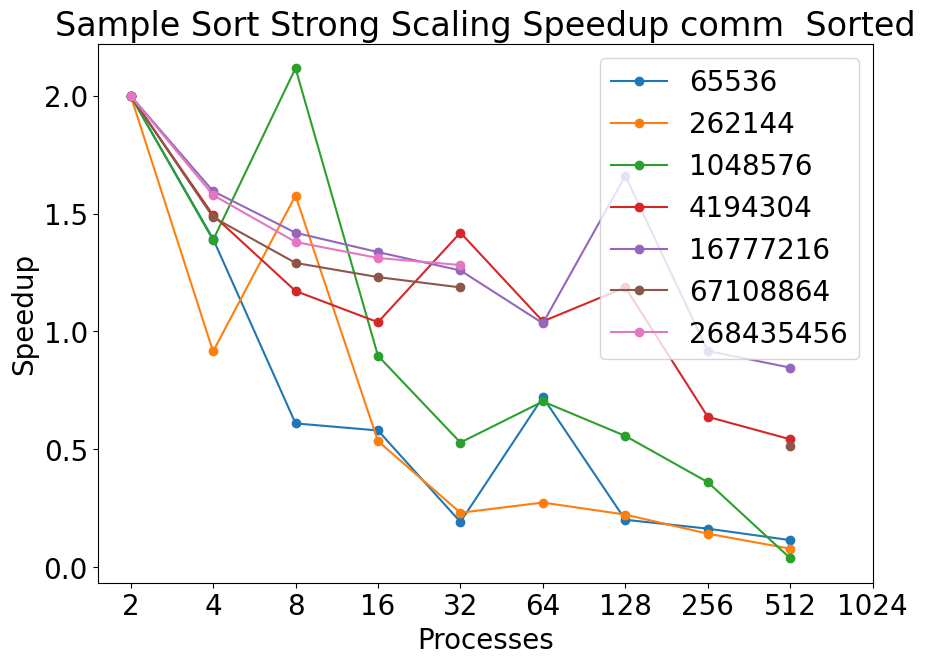

comp_large


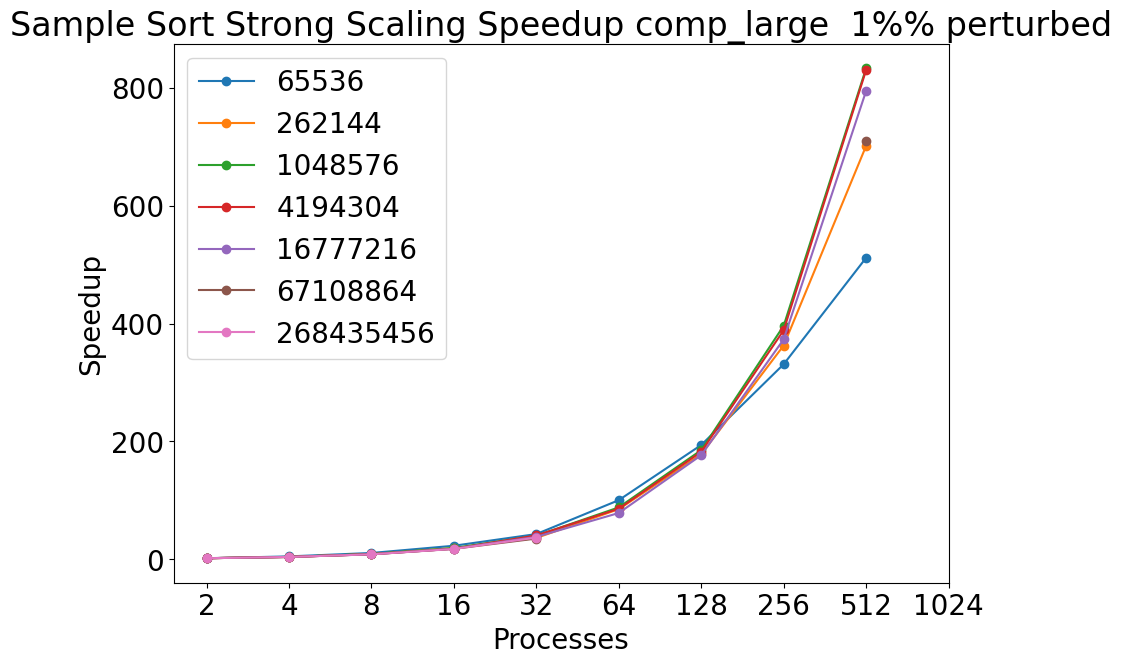

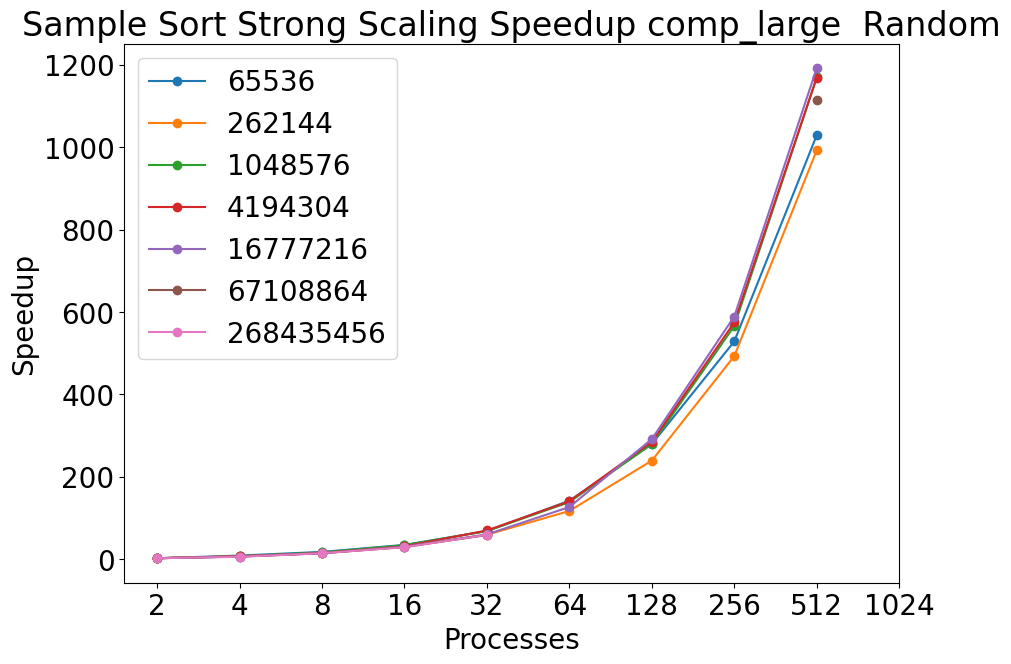

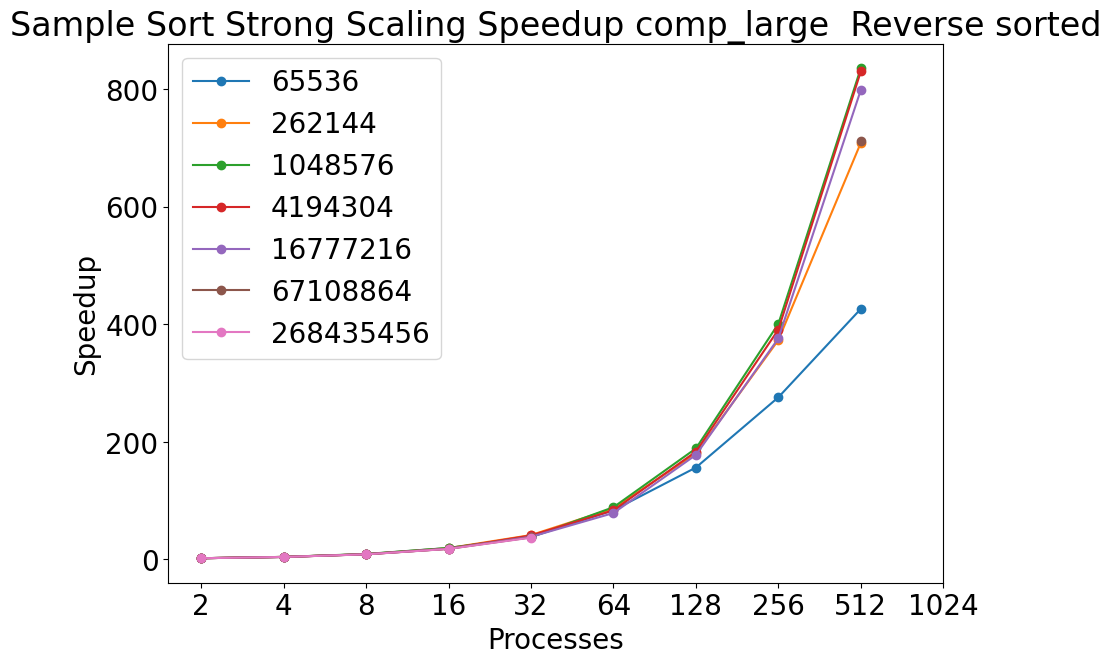

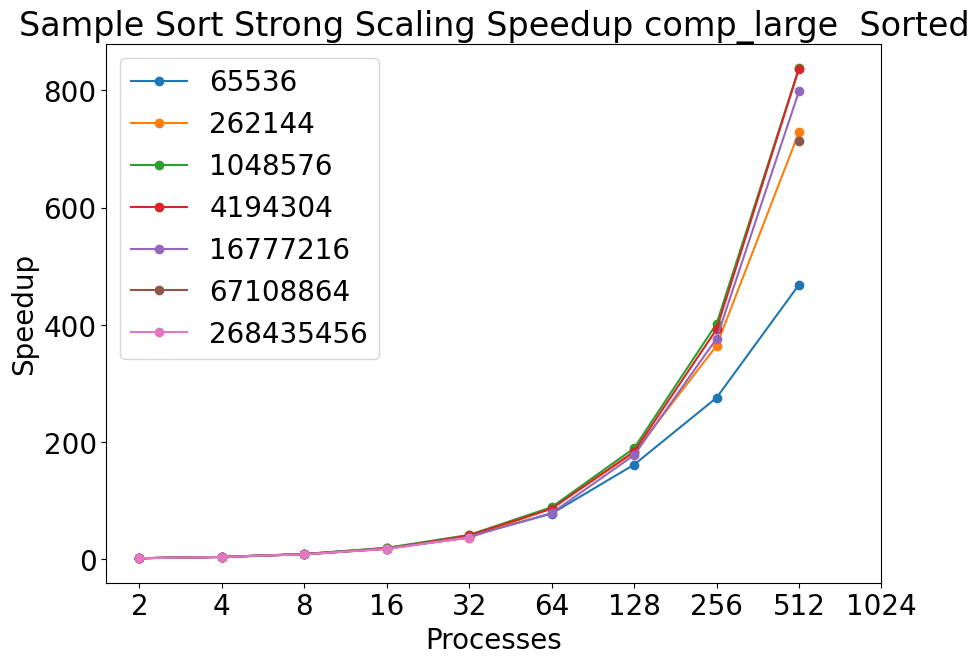

In [27]:
title_template0 = "Sample Sort Strong Scaling Speedup {}  {}"

for node in tk.graph.traverse():
    if node.frame['name'] == 'main' or node.frame['name'] == 'comp_large' or node.frame['name'] == 'comm':
        print(node.frame['name'])
        for itype in input_types:
            title = title_template0.format(node.frame['name'], itype)
            df = tk.dataframe.loc[node, 'Avg time/rank']
            df = (df.loc[df.index.get_level_values('input_type') == itype])
            df = df.unstack(level="input_size")
            df = df.unstack(level="input_type")
            twoProcTimes = (df.loc[df.index.get_level_values('num_procs') == 2].values)[0]

            for i in range(0,len(twoProcTimes)):
                twoProc = twoProcTimes[i]
                df[array_sizes[i]] = (df[array_sizes[i]] / (2*twoProc))**-1

            # uncomment the next line to print out times and speedups
            # print(df[array_sizes])
            plot_mpl(df, title, "Processes", "Speedup", array_sizes)

# WEAK SCALING

(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 26.03it/s]
0it [00:00, ?it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)
(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 25.13it/s]
0it [00:00, ?it/s]
/usr/local/lib/python3.10/dist-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace me

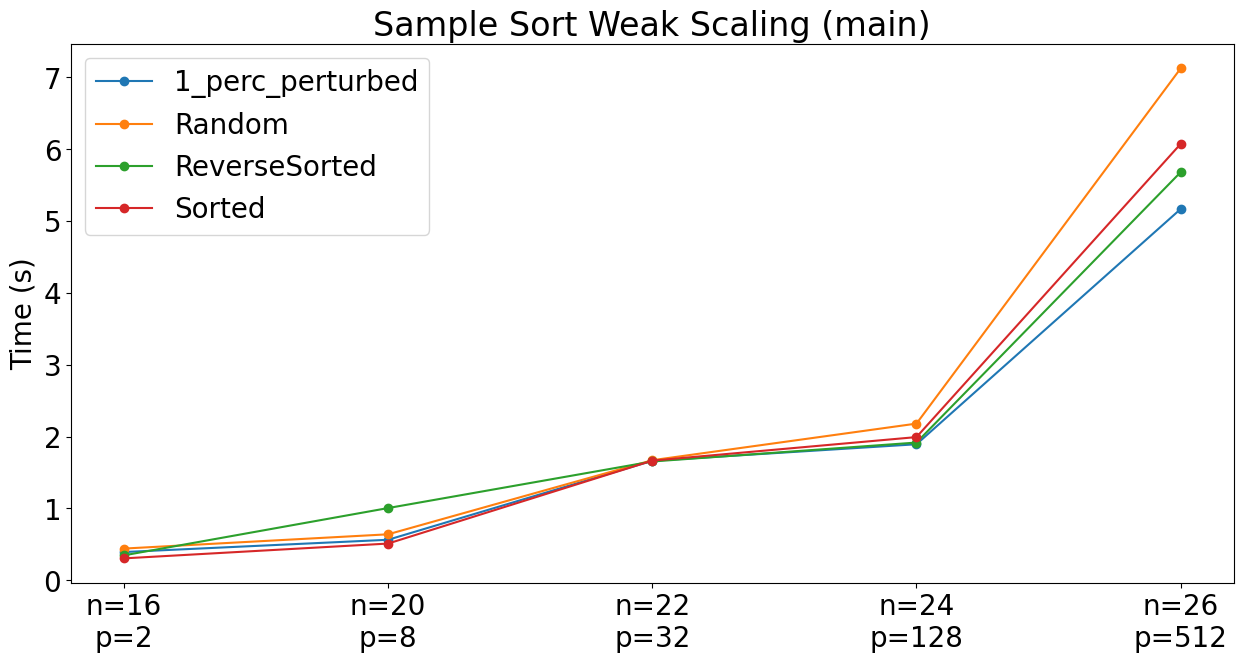

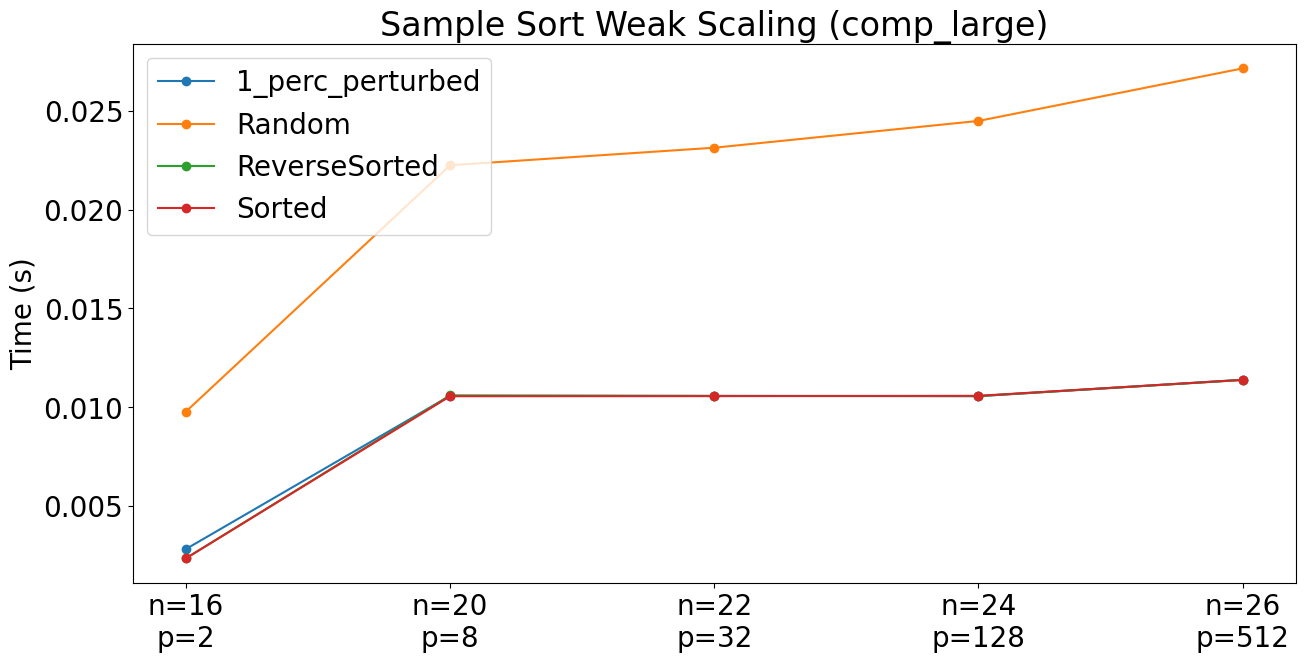

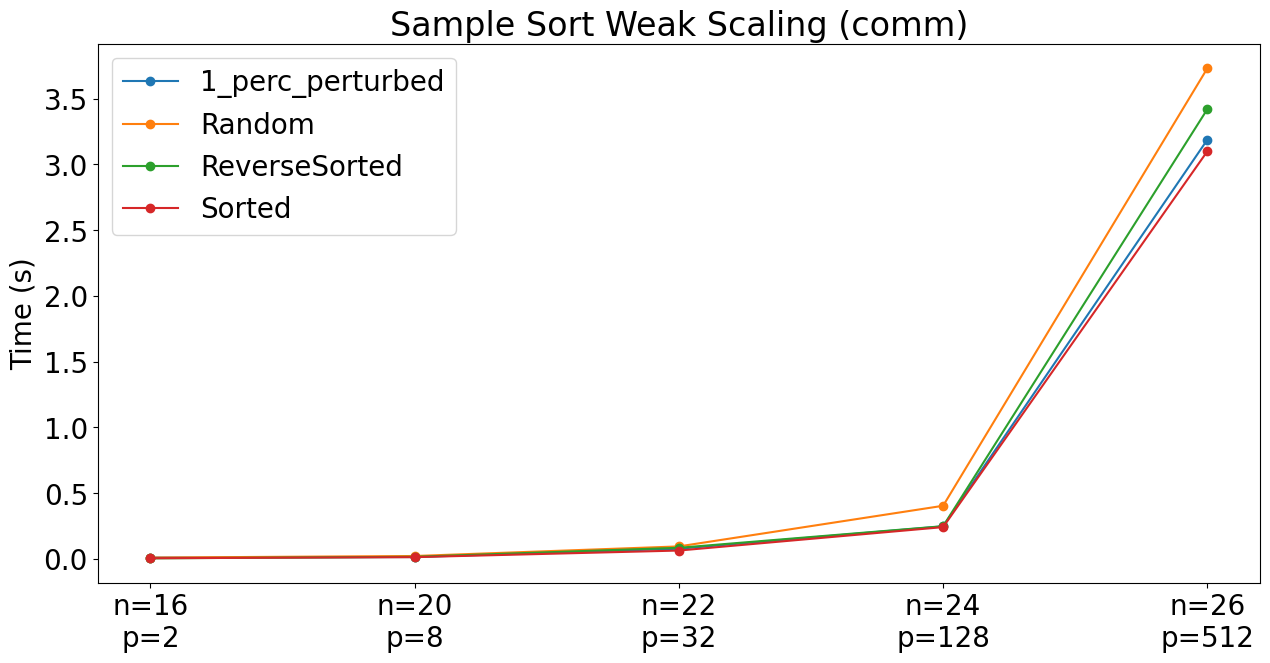

In [30]:
# iterate through nodes
title_template0 = "Sample Sort Weak Scaling ({})"

weak_scaling_pairs= [(16, 2), (20, 8), (22, 32), (24, 128), (26, 512)]

measurement_regions = ['main', 'comp_large', 'comm']
input_type = ['1_perc_perturbed', 'Random', 'ReverseSorted', 'Sorted']
x_labels = ['n={}\np={}'.format(n, p) for n, p in weak_scaling_pairs]
data = {}

# if comp_large, comm, or main, print the strong scaling times
for itype in input_type:
    data[itype] = {region: [] for region in measurement_regions}

    for n, p in weak_scaling_pairs:
        path = "/content/drive/My Drive/caliper/cali-sampsort-p{}-exp{}-{}.cali".format(p,n, itype)
        tk_temp = th.Thicket.from_caliperreader(glob(path))
        tk_temp.metadata_column_to_perfdata("num_procs")
        tk_temp.metadata_column_to_perfdata("input_size")
        for node in tk_temp.graph.traverse():
            if (node.frame['name'] not in measurement_regions):
                continue
            value = list(tk_temp.dataframe.loc[node, 'Avg time/rank'])[0]
            data[itype][node.frame['name']].append(value)

for region in measurement_regions:
    title = title_template0.format(region)
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(1, 1, 1)

    for t in input_type:
        ax.plot(range(len(data[t][region])), data[t][region], label=t, marker='o')

    ax.set_title(title)
    ax.set_ylabel('Time (s)')
    ax.legend()
    plt.xticks(range(len(weak_scaling_pairs)))
    ax.set_xticklabels(x_labels)
    plt.show()

# CLOCK TIME

used in the presentation but not in the report

main


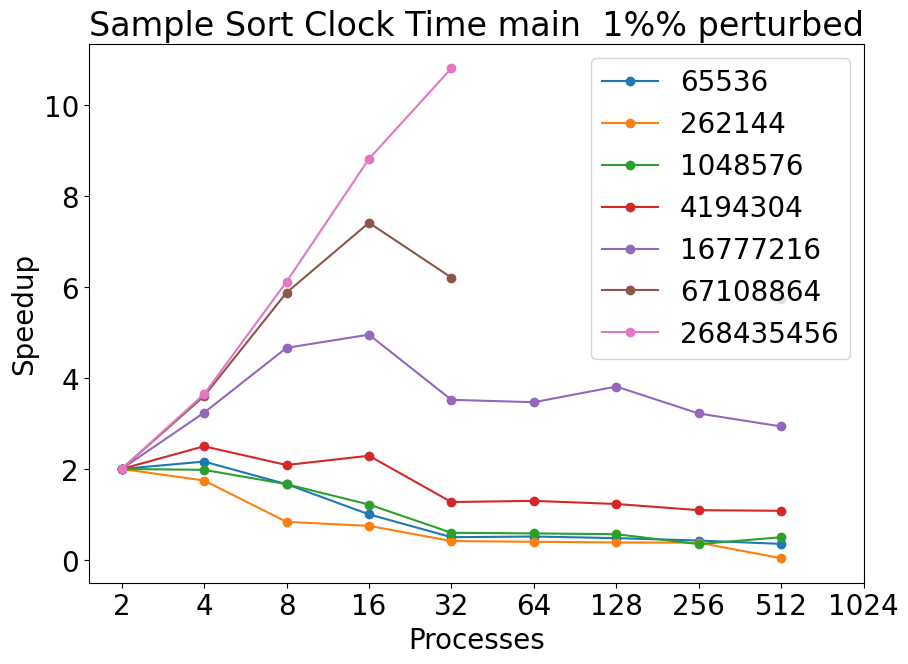

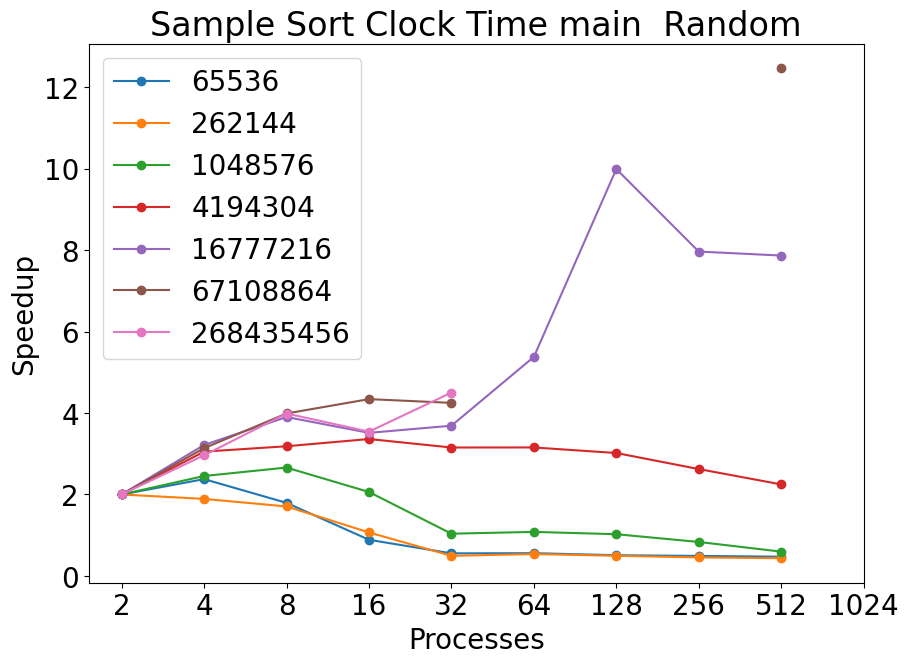

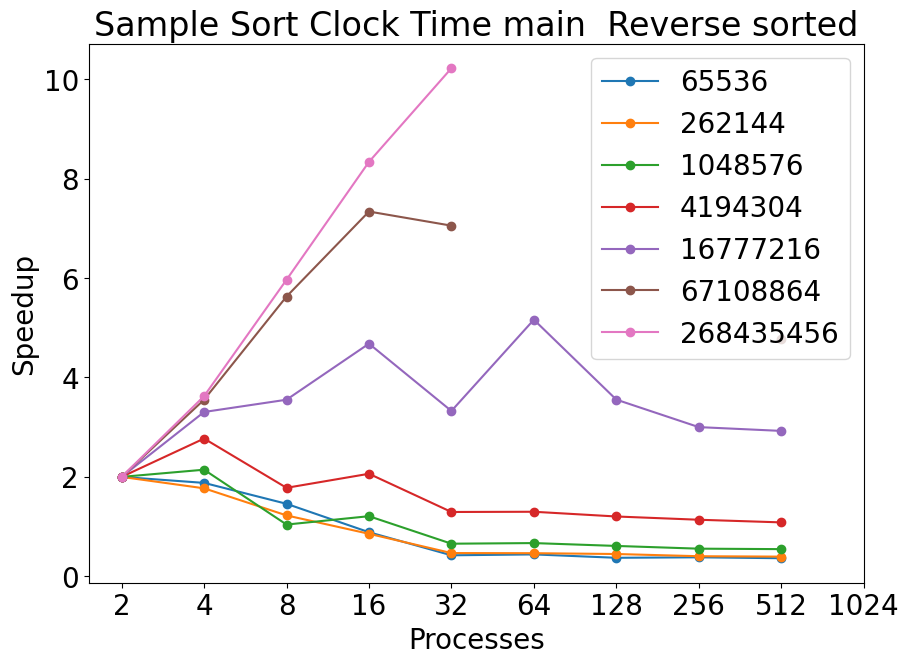

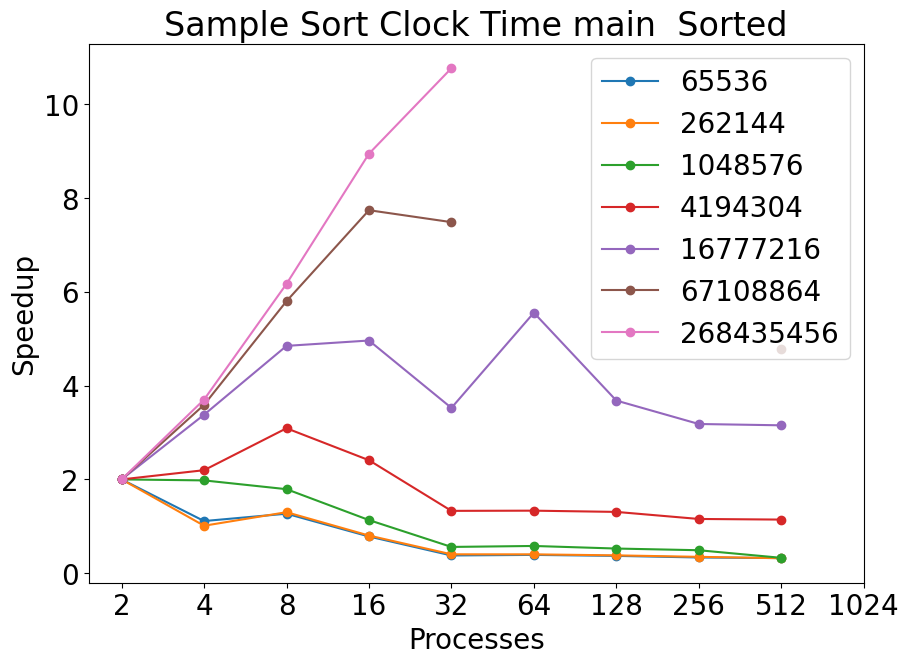

comm


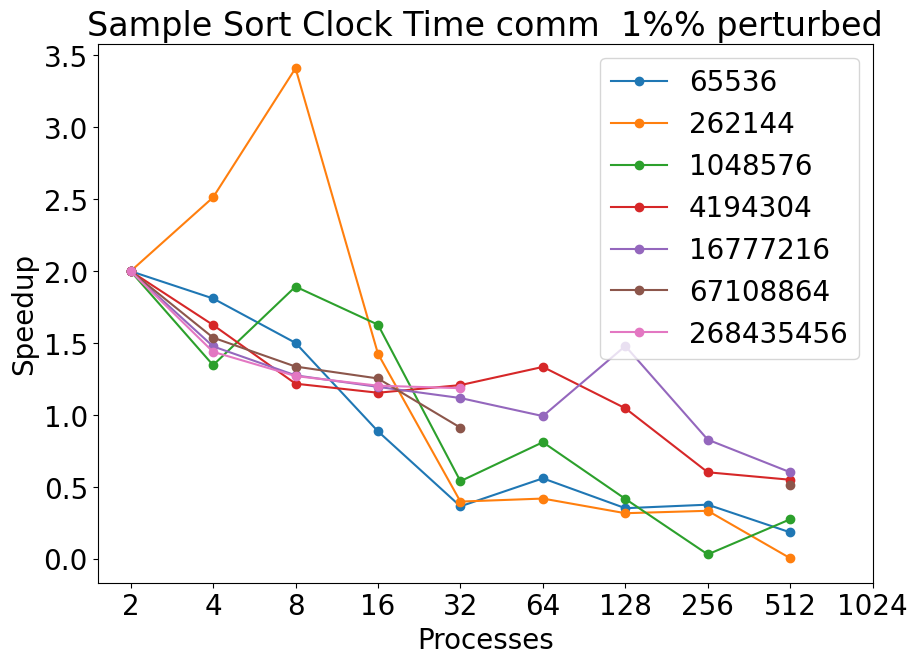

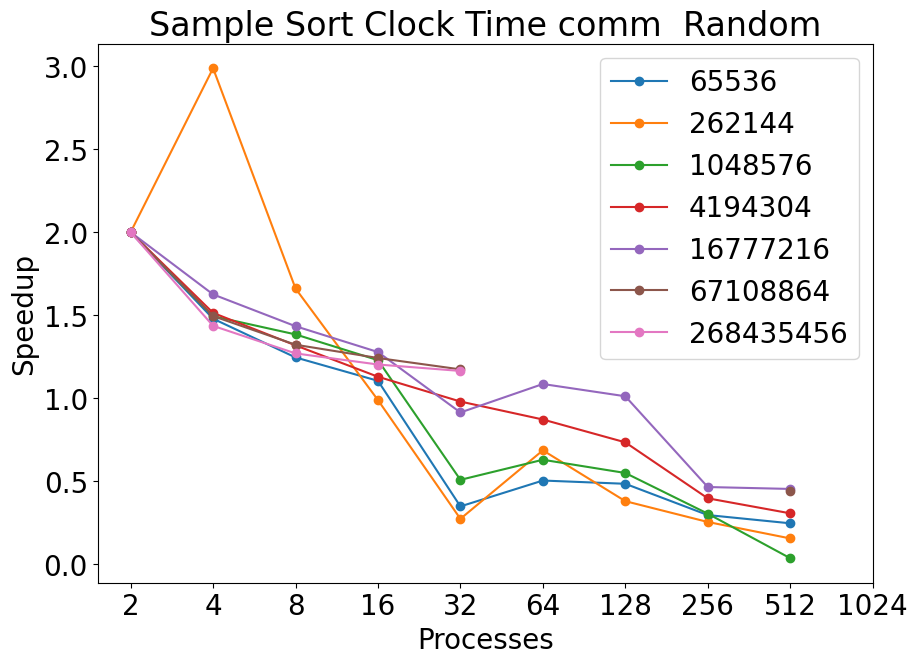

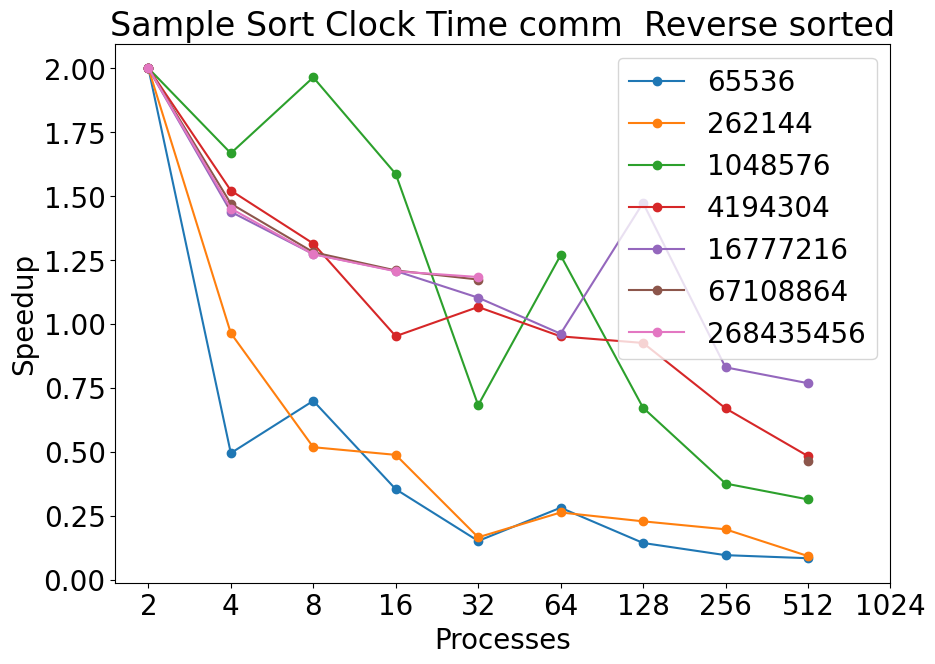

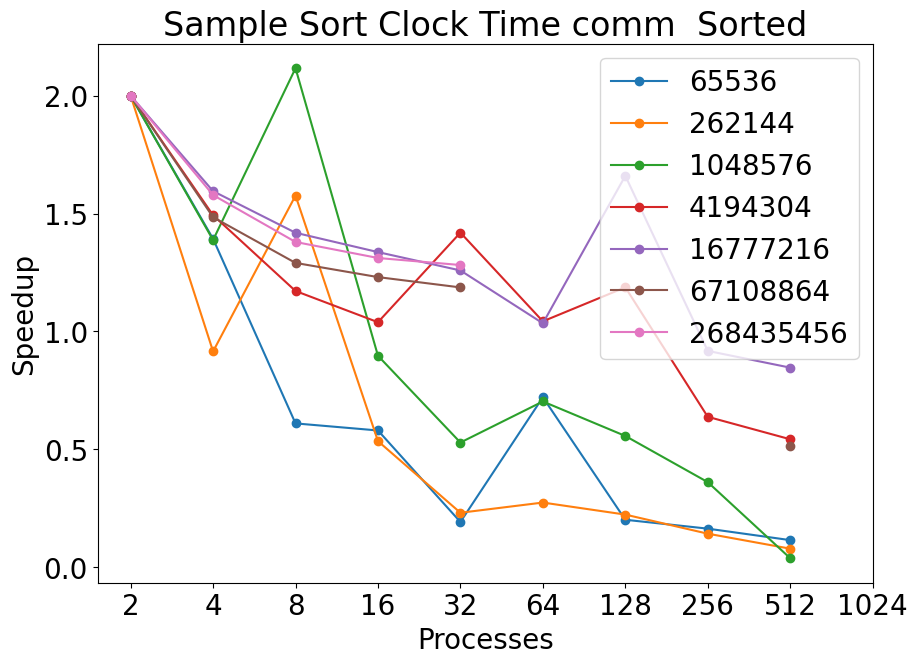

In [29]:
title_template0 = "Sample Sort Clock Time {}  {}"

# Initialize an empty dictionary to store overall times
overall_times = {}

for node in tk.graph.traverse():
    if node.frame['name'] in ['main', 'comm']:
        print(node.frame['name'])
        for itype in input_types:
            title = title_template0.format(node.frame['name'], itype)
            df = tk.dataframe.loc[node, 'Avg time/rank']
            df = (df.loc[df.index.get_level_values('input_type') == itype])
            df = df.unstack(level="input_size")
            df = df.unstack(level="input_type")

            if node.frame['name'] == 'main':
                # Initialize overall_times with main times for each input type and size
                overall_times[itype] = df.copy()
            elif node.frame['name'] == 'comm':
                # add comm's time
                overall_times[itype] += df

            # Calculate speedup based on twoProcTimes if applicable
            twoProcTimes = (df.loc[df.index.get_level_values('num_procs') == 2].values)[0]
            for i in range(len(twoProcTimes)):
                twoProc = twoProcTimes[i]
                df[array_sizes[i]] = (df[array_sizes[i]] / (2 * twoProc)) ** -1
            plot_mpl(df, title, "Processes", "Time (s)", array_sizes)
